In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [10]:
df = pd.read_csv("C:/Users/agnis/Downloads/delivery_time.csv")

In [11]:
df.shape

(21, 2)

In [12]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


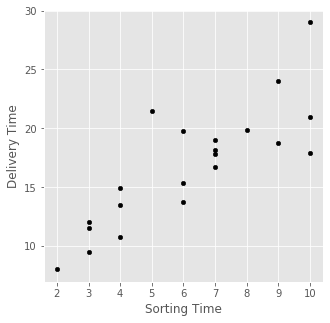

In [15]:
df.plot(kind="scatter",
           x="Sorting Time",
           y="Delivery Time",
           figsize=(5,5),
           color="black");

In [16]:
from sklearn import linear_model

In [17]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the data
regression_model.fit(X = pd.DataFrame(df["Sorting Time"]), 
                     y = df["Delivery Time"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

6.58273397199706
[1.6490199]


In [19]:
regression_model.score(X = pd.DataFrame(df["Sorting Time"]), 
                       y = df["Delivery Time"])

0.6822714748417231

In [20]:
train_prediction = regression_model.predict(X = pd.DataFrame(df["Sorting Time"]))

# Actual - prediction = residuals
residuals = df["Delivery Time"] - train_prediction

residuals.describe()

count    2.100000e+01
mean    -2.706829e-15
std      2.860590e+00
min     -5.172933e+00
25%     -2.029794e+00
50%     -2.979366e-02
75%      8.741268e-01
max      6.672167e+00
Name: Delivery Time, dtype: float64

In [22]:
SSResiduals = (residuals**2).sum()

SSTotal = ((df["Sorting Time"] - df["Sorting Time"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

-0.26634133858716735

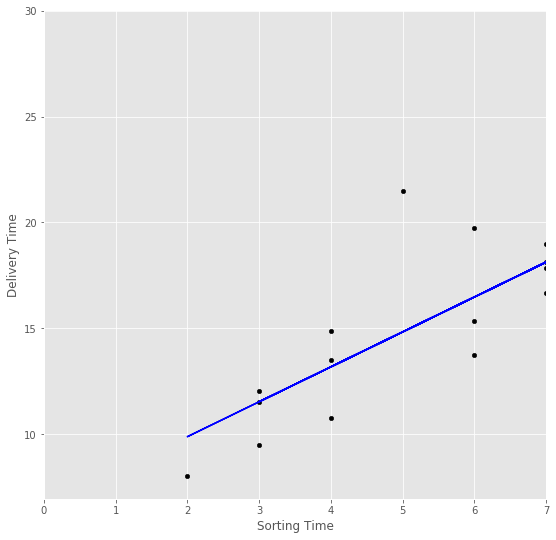

In [24]:
df.plot(kind="scatter",
           x="Sorting Time",
           y="Delivery Time",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(df["Sorting Time"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");



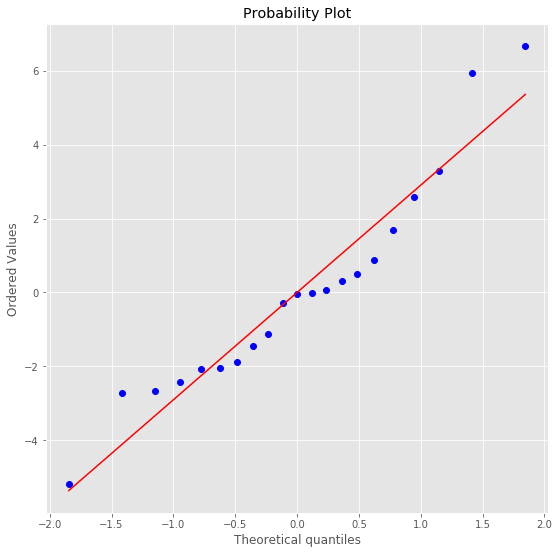

In [31]:
#Making a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

In [32]:
#def rmse(predicted, targets):
    #    return (np.sqrt(np.mean((targets-predicted)**2)))
    

In [34]:
#rmse(train_prediction, df["Delivery Time"])

2.791650327061766

In [35]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, df["Delivery Time"])**0.5

RMSE



2.7916503270617654